# Probability and Measure
Jimmy Hickey

# Probability Triples
### $(\Omega, \mathcal{F}, \pmb{P})$    

$\Omega$: *The sample space*. Any non-empty set.

$\mathcal{F}$: *The $\sigma$-algebra*. A collection of subsets of $\Omega$ that is closed under complement and countable union. 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Contains both $\Omega$ itself and $\varnothing$.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Also closed under countable intersection.

$\pmb{P}$: *The probability measure*. A mapping of $\mathcal{F}$ to $\mathbb{R}$ such that $0\leq \pmb{P}(A) \leq 1$ for all $A \in \mathcal{F}$ and $\pmb{P}$ is countably additive.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\pmb{P}(\varnothing) = 0$ and $\pmb{P}(\Omega) = 1$

# Properties

## Monotonicity
For $A \subseteq B$,

\begin{align*}
\pmb P (B) = \pmb P (A) + \pmb P (B \setminus A) & \geq \pmb P (A)\\
\pmb P (A) & \leq \pmb P (B)
\end{align*}

## Countable Subadditivity
For any sequence $A_1, A_2, \dots \in \mathcal{F}$, by additivity and monotonicity,
\begin{align*}
\pmb{P}(A_1\cap A_2 \cap \dots) & = \pmb{P}(A_1 \cup (A_2\setminus A_1) \cup (A_3\setminus A_2\setminus A_1) \cup \dots)  \\
& = \pmb P(A_1) + \pmb P(A_1\setminus A_2) + \pmb P(A_1\setminus A_2\setminus A_3) + \dots\\ 
& \leq \pmb P(A_1) + \pmb P(A_2) + \pmb P(A_3) + \dots
\end{align*}

# Let's toss some coins

$\Omega = \{t_1, t_2, \dots, t_n | t_i = \text{heads or tails}\}$

$\mathcal{F} = \mathscr{P} (\Omega)$

$\pmb P(A)= \dfrac{|A|}{2^n}$

Take $A$ to be the set of all elements of $\Omega$ such that the first two tosses are heads.

With $n=3$, we get $\Omega = \{$(T, T, T), (T, H, T), (H, T, T), **(H, H, T)**, 

(T, T, H), (T, H, H), (H, T, H), **(H, H, H)**$\}$.

So, $\pmb{P}(A) = \frac{2}{8} = \frac{1}{4}$.

With $n=2$, we get $\Omega = \{$(T, T), (T, H), (H, T), **(H, H)**$\}$.

So, $\pmb{P}(A) = \frac{1}{4}$.

# Let's toss a lot (countably infinite) of coins
$\Omega = \{t_1, t_2, \dots\ | t_i = \text{heads or tails}\}$

"For every countably infinite collection of elements $A_k\in \mathcal{F}$, we add the following" 

$$\pmb P \big( \bigcup\limits_{k=1}^{\infty}A_K \big) = \sum\limits_{k=1}^{\infty} \pmb P (A_k) $$ with pairwise disjoint $A_i$'s.

### What is the probability of getting an infinite number of heads in a row?
Bernoulli Trials: Take $A_k$ to be the set where the $k^{th}$ event is the first tails.

$A_1 = \{T\}$

$A_2 = \{H, T\}$

$A_3 = \{H, H, T\}$


Then,

\begin{align*}
\pmb P (A_n) &= \dfrac{1}{2^n}\\
\lim\limits_{n\rightarrow \infty} \pmb P(A_n) &= 0.
\end{align*}

# Let's toss even more (uncountably infinte) coins!

$\Omega\subseteq \mathbb{R}$

$\mathcal{F} =$ a $\sigma$-algebra of Borel subsets of $\Omega$

$\pmb P = $ any non-negative, additive set function on $\mathcal{F}$ such that $\pmb P (\Omega) = 1$


A set $A$ is measureable if

* $\mathbb{R} \setminus A$ is also measurable.
* If $\{A_1, A_2, \dots\}$ is a countable collection of measurable sets, then $\{A_1 \cup A_2 \cup \dots \}$ is measurable.
* Every interval is measurable.

We need to map our sets of 0's and 1's to $\mathbb{R}$.

Numbers on $\mathbb{R}$ have the following properties: 
* Every irrational number ends with a never-repeating seqeuence of digits.
* Every rational number ends with an inifinitely repeating sequence of digits.

We can extend this idea to our set.
* Every sequence of non-repeating, inifinite 0's and 1's can be mapped to an irrational number.
* Every sequence of 0's and 1's that is infinitely repeating or finite can be mapped to a rational.

### What about those infinite, consecutive heads?
There are an infinite amount of sets that eventually result in an infinite sequence of heads.

$\{\dots, t_k, H, H, H, \dots\}$

However, this each set of this type ends in countably many heads. 

As we have learned before, the measure of a countable set in an uncountable space is 0.

# A look at the finite case

In [12]:
def plot(data):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    import numpy as np

    import plotly.plotly as py
    # Learn about API authentication here: https://plot.ly/python/getting-started
    # Find your api_key here: https://plot.ly/settings/api

    plt.hist(data)
    plt.title("All heads distribution")
    plt.xlabel("Number of heads")
    plt.ylabel("Frequency")

    fig = plt.gcf()
    #plot_url = py.plot_mpl(fig, filename='Probability of all heads')
    

Expected probability of all heads:	 3.0517578125e-05


<IPython.core.display.Javascript object>


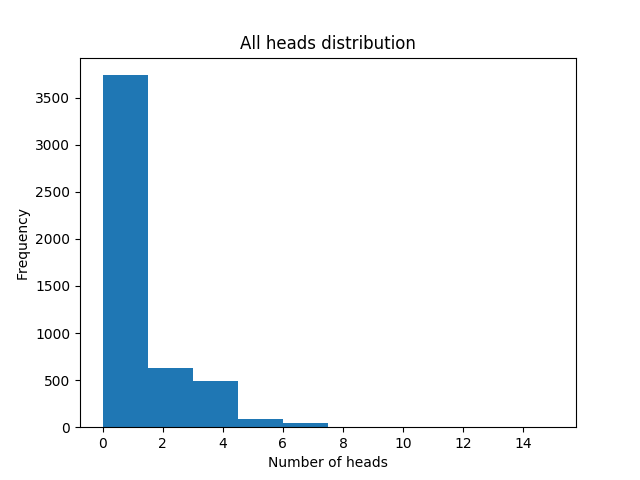

In [13]:
import random
def toss_some_coins(num_toss):
    results = []
    for i in range(num_toss):
        results.append("heads" if random.randint(0,1)==1 else "tails")
    return results

def heads_in_a_row(trial):
    num_heads = 0
    for i in trial:
        if i == "heads":
            num_heads += 1
        else:
            return num_heads
    return num_heads

def do_everything(num_coins, num_trials):
    data = []
    for i in range(5000):
        x = toss_some_coins(num_coins)
        data.append(heads_in_a_row(x))
    print("Expected probability of all heads:\t", 1/2**(num_coins))
    data.append(num_coins)
    plot(data)

num_coins = 15
num_trials = 50000
do_everything(num_coins, num_trials)

# Sources

A First Look At Rigorous Probability Theory by Jefferey S. Rosenthal

http://nptel.ac.in/courses/108106083/lecture8_Infinite%20Coin%20Toss.pdf

Measure Theory and the Probability of an Infinite Sequence of Heads by Kent Slinker